# Introduction to Data Science 2022

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="background-color: #ccfff2"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in Moodle.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle, and complete the following exercises. You will need to create a Kaggle account unless you already have one, but it is quite straightforward. 

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data. 

    <span style="background-color: #ccfff2"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="background-color: #ccfff2"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [8]:
import pandas as pd
import numpy as np

titanicdf = pd.read_csv('train.csv')
titanicdf.shape

(891, 12)

In [4]:
titanicdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="background-color: #ccfff2"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="background-color: #ccfff2"> *Hint: The shape of the data should now be (891, 9).*</span>

In [9]:
processeddf = titanicdf.drop(columns=['Name', 'Ticket', 'PassengerId'])
processeddf.shape

(891, 9)

In [6]:
processeddf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


3. The column <span style="background-color: #ccfff2">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="background-color: #ccfff2">*Cabin*</span>-column.

<span style="background-color: #ccfff2">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [10]:
def getdeck(cabin):
    if type(cabin)==str and cabin[0] in 'AaBbCcDdEeFfGgTt':
        return cabin[0]
    return np.nan
    
processeddf['Deck'] = processeddf.apply(lambda row: getdeck(row['Cabin']), axis=1)
processeddf['Deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Deck, Length: 891, dtype: object

In [11]:
processeddf = processeddf.drop(columns=['Cabin'])

4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="background-color: #ccfff2">*Hint: Pandas can do this for you.*</span>

In [12]:
# Columns to make categories: Sex, Embarked, Deck

processeddf["Deck"] = processeddf["Deck"].astype("category")
processeddf["Sex"] = processeddf["Sex"].astype("category")
processeddf["Embarked"] = processeddf["Embarked"].astype("category")

DeckCodes = dict( enumerate(processeddf['Deck'].cat.categories ) )
SexCodes =  dict( enumerate(processeddf['Sex'].cat.categories ) )
EmbCodes =  dict( enumerate(processeddf['Embarked'].cat.categories ) )

print("Deck codes: ", DeckCodes)
print("Sex codes: ", SexCodes)
print("Embarked codes: ", EmbCodes)


Deck codes:  {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'T'}
Sex codes:  {0: 'female', 1: 'male'}
Embarked codes:  {0: 'C', 1: 'Q', 2: 'S'}


In [13]:
# Then we make them numerical 
newDeckCol = processeddf["Deck"].cat.codes
newSexCol = processeddf["Sex"].cat.codes
newEmbCol = processeddf["Embarked"].cat.codes

In [14]:
# Then we make them numerical 
processeddf["Deck"] = newDeckCol
processeddf["Sex"] = newSexCol
processeddf["Embarked"] = newEmbCol

5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="background-color: #ccfff2">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [15]:
processeddf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,22.0,1,0,7.2500,2,-1
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,-1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,-1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,-1
887,1,1,0,19.0,0,0,30.0000,2,1
888,0,3,0,NaN,1,2,23.4500,2,-1
889,1,1,1,26.0,0,0,30.0000,0,2


In [16]:
# we can identify who has empty values via processeddf.Deck.unique() 
# So we want to update: age (mean = 29.699118), Embarked (mode - S), & Deck (mode = C)
# Using processeddf.mode() & processeddf.mean() 

processeddf['Deck'] = processeddf['Deck'].replace(-1, 2) # 2 = C
processeddf['Embarked'] = processeddf['Embarked'].replace(-1, 2) # 2 = S
processeddf['Age'] = processeddf['Age'].fillna(29.7)

processeddf['Deck'].unique()

array([2, 4, 6, 3, 0, 1, 5, 7], dtype=int8)

6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="background-color: #ccfff2"> .csv</span> file. Then, write another file, this time in <span style="background-color: #ccfff2">JSON</span> format, with the following structure:

In [322]:
#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [17]:
# Write to CSV
processeddf.to_csv('processed-titanic.csv', sep='\t')

# Write to JSon
processeddf.to_json('processed-titanic.json', orient="records", lines=True)


Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [18]:
print("Modes:")
print(processeddf[["Survived", "Sex", "Embarked", "Deck"]].mode())


print('\n')
print("Means:")
print(processeddf[["Pclass", "Age", "SibSp", "Parch", "Fare"]].mean())


Modes:
   Survived  Sex  Embarked  Deck
0         0    1         2     2


Means:
Pclass     2.308642
Age       29.699293
SibSp      0.523008
Parch      0.381594
Fare      32.204208
dtype: float64


2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="background-color: #ccfff2">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="background-color: #ccfff2">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [19]:
# Create DF of (1) only survivors & (2) only nonsurvivors and take means/modes
surivorDf = processeddf.loc[processeddf['Survived']==1]
nonsurvivorDf = processeddf.loc[processeddf['Survived']==0]

print("Average Survivor Statistics\n")
survStats = surivorDf.agg(
    {
        "Survived": ["mode"],
        "Sex": ["mode"],
        "Embarked": ["mode"],
        "Deck": ["mode"],
        "Pclass": ["mean"],
        "Age": ["mean"],
        "SibSp": ["mean"],
        "Parch": ["mean"],
        "Fare": ["mean"],
    }
)
print(survStats)

print("\nAverage Non-Survivor Statistics\n")
nonsurvStats = nonsurvivorDf.agg(
    {
        "Survived": ["mode"],
        "Sex": ["mode"],
        "Embarked": ["mode"],
        "Deck": ["mode"],
        "Pclass": ["mean"],
        "Age": ["mean"],
        "SibSp": ["mean"],
        "Parch": ["mean"],
        "Fare": ["mean"],
    }
)
print(nonsurvStats)

Average Survivor Statistics

     Survived  Sex Embarked Deck    Pclass        Age     SibSp     Parch  \
         mode mode     mode mode    Pclass        Age     SibSp     Parch   
0         1.0  0.0      2.0  2.0       NaN        NaN       NaN       NaN   
mean      NaN  NaN      NaN  NaN  1.950292  28.549912  0.473684  0.464912   

           Fare  
           Fare  
0           NaN  
mean  48.395408  

Average Non-Survivor Statistics

     Survived  Sex Embarked Deck    Pclass        Age     SibSp    Parch  \
         mode mode     mode mode    Pclass        Age     SibSp    Parch   
0         0.0  1.0      2.0  2.0       NaN        NaN       NaN      NaN   
mean      NaN  NaN      NaN  NaN  2.531876  30.415301  0.553734  0.32969   

           Fare  
           Fare  
0           NaN  
mean  22.117887  


In [20]:
# Where we have:
print("Deck codes: ", DeckCodes)
print("Sex codes: ", SexCodes)
print("Embarked codes: ", EmbCodes)

Deck codes:  {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'T'}
Sex codes:  {0: 'female', 1: 'male'}
Embarked codes:  {0: 'C', 1: 'Q', 2: 'S'}


3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group? 

    <span style="background-color: #ccfff2">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

In [21]:
surivorDf = processeddf.loc[processeddf['Survived']==1]
femSurivorDf = surivorDf.loc[surivorDf['Sex']==0.0] # fem survivor
emb = femSurivorDf[femSurivorDf['Embarked']==2] # embarked at S, female, survived
dec = emb[emb['Deck']==2]
age = dec[dec['Age']>26]
age = age[age['Age']<29]
classp = age[age['Pclass']==2]

print("The following people are female survivors between the ages of 26 and 29, in class 2, who embarked at S and were in deck C.\n")
print(classp)


notsurivorDf = processeddf.loc[processeddf['Survived']==0]
femSurivorDf = notsurivorDf.loc[notsurivorDf['Sex']==1.0] # fem survivor
emb = femSurivorDf[femSurivorDf['Embarked']==2] # embarked at S, female, survived
dec = emb[emb['Deck']==2]
age = dec[dec['Age']>29]
age = age[age['Age']<31]
classp = age[age['Pclass']<2]
classp = classp[classp['Pclass']<3]

print("\nThe following people are male non-survivors between the ages of 28 and 32, between class 2 &3, who embarked at S and were in deck C.\n")
print(classp)

The following people are female survivors between the ages of 26 and 29, in class 2, who embarked at S and were in deck C.

     Survived  Pclass  Sex   Age  SibSp  Parch   Fare  Embarked  Deck
399         1       2    0  28.0      0      0  12.65         2     2
426         1       2    0  28.0      1      0  26.00         2     2
443         1       2    0  28.0      0      0  13.00         2     2
635         1       2    0  28.0      0      0  13.00         2     2

The following people are male non-survivors between the ages of 28 and 32, between class 2 &3, who embarked at S and were in deck C.

     Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  Deck
168         0       1    1  29.7      0      0   25.9250         2     2
270         0       1    1  29.7      0      0   31.0000         2     2
351         0       1    1  29.7      0      0   35.0000         2     2
527         0       1    1  29.7      0      0  221.7792         2     2
602         0       1    1

4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="background-color: #ccfff2">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="background-color: #ccfff2">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

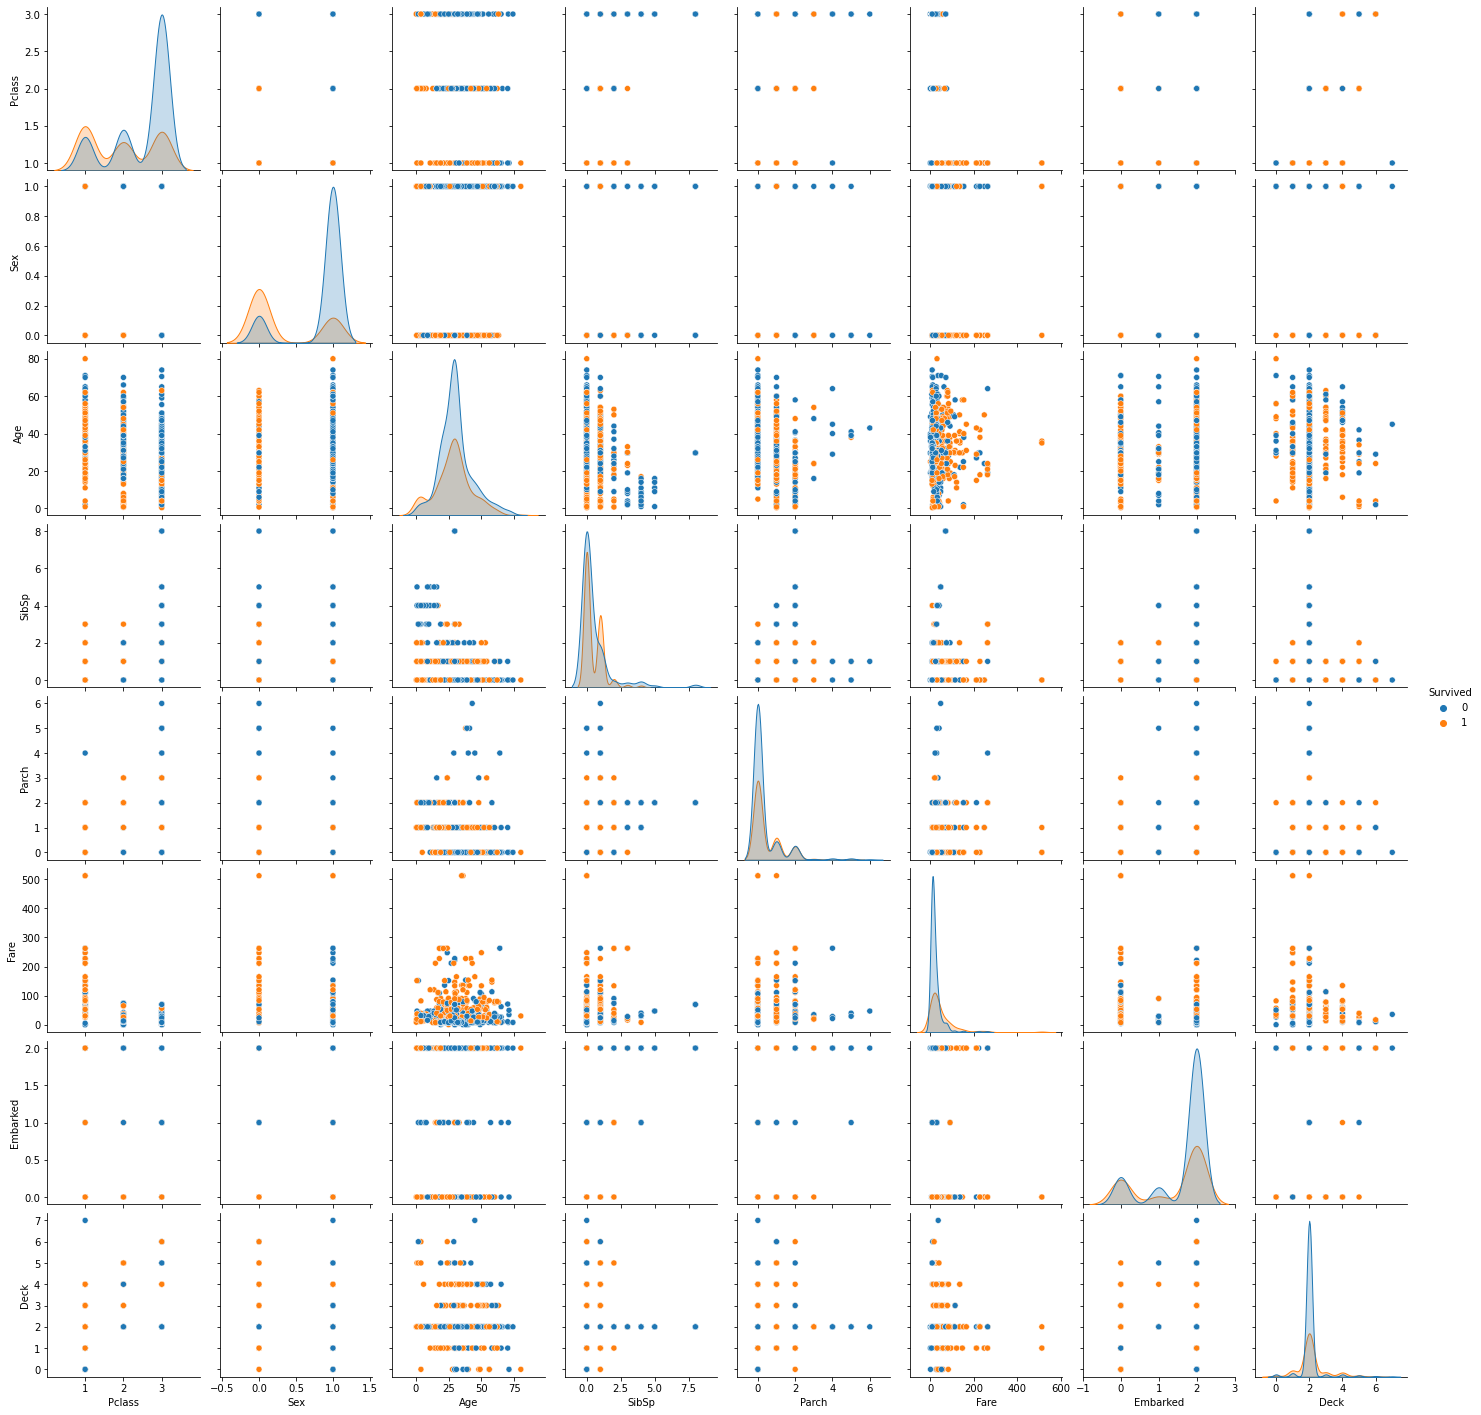

In [22]:
import seaborn as sns

data = pd.DataFrame(processeddf)
sns.pairplot(data, hue="Survived")

In [23]:
# Where we have:
print("Deck codes: ", DeckCodes)
print("Sex codes: ", SexCodes)
print("Embarked codes: ", EmbCodes)

Deck codes:  {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'T'}
Sex codes:  {0: 'female', 1: 'male'}
Embarked codes:  {0: 'C', 1: 'Q', 2: 'S'}


5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

It definitely affected the results. When trying to find an average non-survivor in the age range, there were very many because the mean of ages ended up being the age of the average non-surivor. Also, because the mode of the deck value was C, I ended up labeling very many people as having had been in deck C (more than I suspect would fit). If we had ignored these people, however, we would have removed data from other columns and had less data. 

It is a tradeoff. I think that looking back, I would have liked to read about what others have done since this dataset is so widely shared, and then maybe used a combination of approaches. 

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="background-color: #ccfff2">pos.txt</span> and <span style="background-color: #ccfff2">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on Moodle after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [3]:
from collections import Counter
import pandas as pd
import numpy as np

posdf=pd.read_table('pos.txt',header=None, names=["text"])
negdf=pd.read_table('neg.txt',header=None, names=["text"])

counts = [Counter(posdf['text']), Counter(negdf['text'])]
poswords = counts[0].most_common(5)
negwords = counts[1].most_common(5)
    
print("Positive words: ", poswords, "\n\nNegative words: ", negwords)

Positive words:  [('work great', 21023), ('good', 20173), ('great', 15930), ('work', 15199), ('great product', 9854)] 

Negative words:  [('work', 412), ('junk', 292), ('fit', 273), ('good', 243), ('didnt work', 214)]


The positive words do have positive connotation, including: work great, good, great, great product. In comparison, the negative words have less obvious words such as fit and good, even though the following 

2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="background-color: #ccfff2">2 x m</span> matrix, where <span style="background-color: #ccfff2">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="background-color: #ccfff2">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create a list of neg and pos values 
posrevlist = posdf.dropna()['text'].tolist() # .. skipping these
negrevlist = negdf.dropna()['text'].tolist()
              
# create a vectorizer for both using IDF 
vectorizer_neg=TfidfVectorizer(use_idf=True)
vectorizer_pos=TfidfVectorizer(use_idf=True)

# fit the data
negtfIdf = vectorizer_neg.fit_transform(negrevlist)
postfIdf = vectorizer_pos.fit_transform(posrevlist)

# print(negtfIdf, pd.DataFrame))

# create df of phrase to tf-idf value
negdf = pd.DataFrame(negtfIdf[0].T.todense(), index=vectorizer_neg.get_feature_names(), columns=["TF-IDF"])
posdf = pd.DataFrame(postfIdf[0].T.todense(), index=vectorizer_pos.get_feature_names(), columns=["TF-IDF"])


KeyError: 'text'

In [63]:
# sort these words from highest to lowest tf-idf value
negdf = negdf.sort_values('TF-IDF', ascending=False)
posdf = posdf.sort_values('TF-IDF', ascending=False)

In [62]:
# combine these to make a single 2xm matrix, where m = unique # of words
result = negdf.join(posdf, lsuffix='-neg', rsuffix='-pos')
result = result.transpose()
result

,pick,suck,bare,pretti,wast,money,car,dont,00000000,00018,...,zyklon,zymol,zync,zytel,zz,zzp,zzr600,zzzzz,zzzzzz,zzzzzzz
TF-IDF-neg,0.460081,0.430729,0.413287,0.367889,0.303924,0.274073,0.263409,0.244498,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TF-IDF-pos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN


3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [72]:
print('Most common negative words: ', negdf.head(5))
print('\nMost common positive words: ',posdf.head(5))
print('\n\n')
print('Most common words across entire neg document:', negwords)
print('Most common words across entire pos document:', poswords)

Most common negative words:            TF-IDF
pick    0.460081
suck    0.430729
bare    0.413287
pretti  0.367889
wast    0.303924

Most common positive words:            TF-IDF
stand   0.584363
review  0.271752
phone   0.183685
im      0.165952
iphon   0.149642



Most common words across entire neg document: [('work', 412), ('junk', 292), ('fit', 273), ('good', 243), ('didnt work', 214)]
Most common words across entire pos document: [('work great', 21023), ('good', 20173), ('great', 15930), ('work', 15199), ('great product', 9854)]


I would say that the TF/IDF didn't make much of an impovement. The most positive IDF words aren't exactly positive, more items that have likely been purchased. Whereas I see an improvement in the most common negative words via idf.

4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset. 

    <span style="background-color: #ccfff2">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

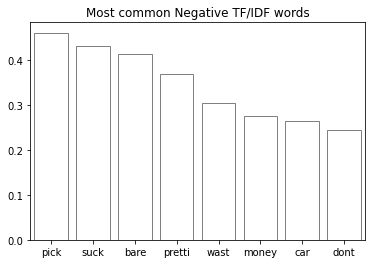

In [98]:
# 10 most negative words 
negplot = sns.barplot(data=negdf.head(8).transpose(),edgecolor=".5", facecolor=(0, 0, 0, 0)).set(title='Most common Negative TF/IDF words')


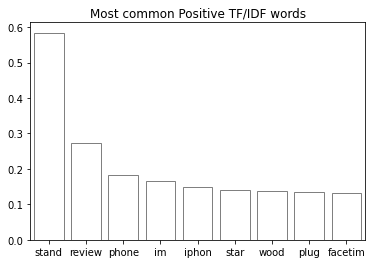

In [96]:
posplot = sns.barplot(data=posdf.head(9).transpose(),edgecolor=".5", facecolor=(0, 0, 0, 0)).set(title='Most common Positive TF/IDF words')

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



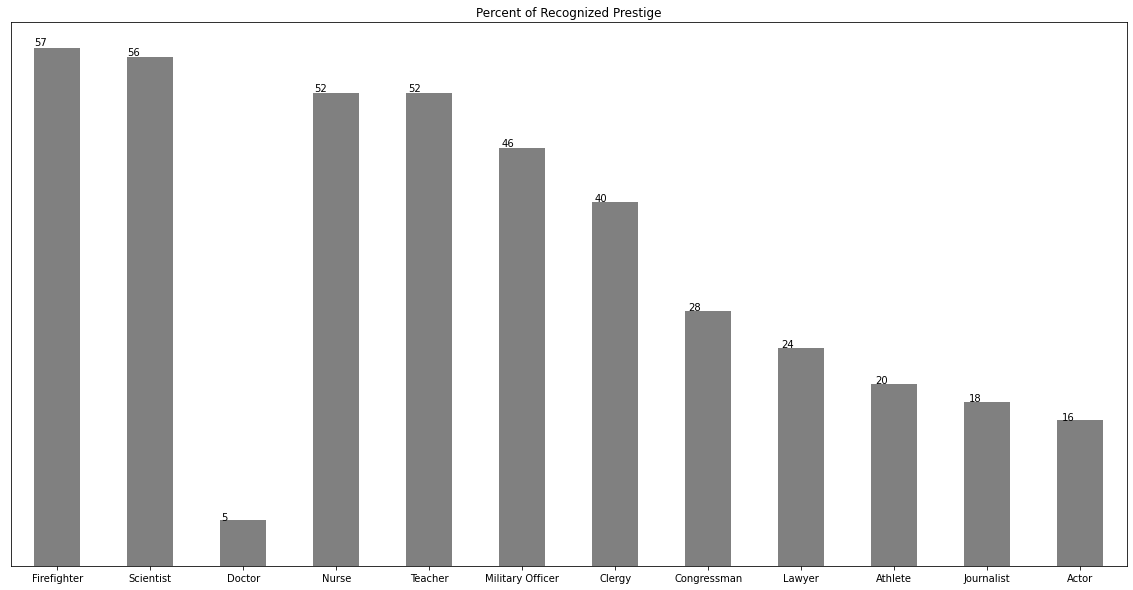

In [560]:
# First graph original and new is in the PDF 
# Second graph. Original is in the PDF 
df = pd.DataFrame({'lab':['Firefighter', 'Scientist', 'Doctor', 'Nurse', 'Teacher', 'Military Officer', 'Clergy', 'Congressman', 'Lawyer', 'Athlete', 'Journalist', 'Actor'], 'val':[57, 56, 5, 52, 52, 46, 40, 28, 24, 20, 18, 16]})
ax = df.plot.bar(x='lab', y='val', rot=0,legend=False, figsize=(20,10), title="Percent of Recognized Prestige", color='#808080')
ax.xaxis.set_label_text("")
ax.yaxis.set_visible(False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

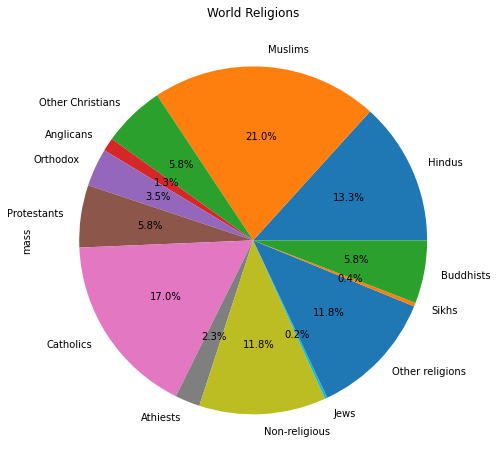

In [567]:
# third graph. Original and new are in the PDF 
df = pd.DataFrame({'mass': [13.26,21.01,5.77,1.25,3.53,5.78,16.99,2.32,11.77,.23,11.78,.35,5.84]},
                  index=['Hindus', 'Muslims', 'Other Christians', 'Anglicans','Orthodox', 'Protestants', 'Catholics', 'Athiests', 'Non-religious', 'Jews', 'Other religions',  'Sikhs', 'Buddhists'])
plot = df.plot.pie(y='mass', autopct='%1.1f%%', figsize=(8, 8), legend=False, title="World Religions")
ax.xaxis.set_label_text("")
ax.yaxis.set_visible(False)


**Submit a PDF with all the charts (the ones you found and the ones you produced).**